## EDA

In [54]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Load datasets
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [57]:
print(train_data.shape)
print(test_data.shape)

(2051, 81)
(878, 80)


In [58]:
list(test_data.columns) == list(train_data.drop('SalePrice', axis=1).columns)

True

In [59]:
drop_cols = ['id', 'pid']
train_data = train_data.drop(drop_cols, axis=1)
test_data = test_data.drop(drop_cols, axis=1)

KeyError: "['id' 'pid'] not found in axis"

In [12]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ms_subclass,2051.0,57.008776,42.824223,20.0,20.0,50.0,70.00,190.0
lot_frontage,1721.0,69.055200,23.260653,21.0,58.0,68.0,80.00,313.0
lot_area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.50,159000.0
overall_qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.00,10.0
overall_cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.00,9.0
year_built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.00,2010.0
year_remod/add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.00,2010.0
mas_vnr_area,2029.0,99.695909,174.963129,0.0,0.0,0.0,161.00,1600.0
bsmtfin_sf_1,2050.0,442.300488,461.204124,0.0,0.0,368.0,733.75,5644.0
bsmtfin_sf_2,2050.0,47.959024,165.000901,0.0,0.0,0.0,0.00,1474.0


In [60]:
features_num = list(train_data._get_numeric_data().drop(['MS SubClass', 'Mo Sold', 'Yr Sold', 'SalePrice'], axis=1))
features_cat = [x for x in train_data.columns if (x not in features_num) and (x != 'SalePrice')]

In [62]:
train_data['MS SubClass'] = train_data['MS SubClass'].astype(str)
train_data['Mo Sold'] = train_data['Mo Sold'].astype(str)
train_data['Yr Sold'] = train_data['Yr Sold'].astype(str)

test_data['MS SubClass'] = test_data['MS SubClass'].astype(str)
test_data['Mo Sold'] = test_data['Mo Sold'].astype(str)
test_data['Yr Sold'] = test_data['Yr Sold'].astype(str)

In [63]:
train_data.isnull().sum().sort_values(ascending = False).head(25)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
dtype: int64

In [64]:
drop_cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
train_data = train_data.drop(drop_cols, axis=1)
test_data = test_data.drop(drop_cols, axis=1)
for x in drop_cols:
    if x in features_num:
        features_num.remove(x)
    elif x in features_cat:
        features_cat.remove(x)

In [65]:
train_data[features_num] = train_data[features_num].fillna(0)
test_data[features_num] = train_data[features_num].fillna(0)
train_data[features_cat] = train_data[features_cat].fillna('null')
test_data[features_cat] = train_data[features_cat].fillna('null')

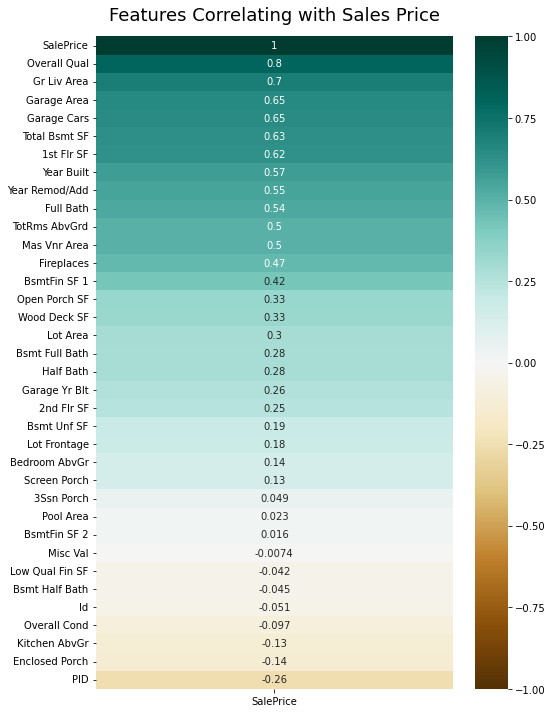

In [68]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train_data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [17]:
train_data.isnull().mean().sort_values(ascending=False)

ms_subclass      0.0
garage_type      0.0
functional       0.0
totrms_abvgrd    0.0
kitchen_qual     0.0
                ... 
mas_vnr_area     0.0
mas_vnr_type     0.0
exterior_2nd     0.0
exterior_1st     0.0
saleprice        0.0
Length: 74, dtype: float64

## Feature Engineering

In [69]:
train_data = pd.get_dummies(train_data, columns=features_cat, drop_first=True) 


In [70]:
train_data.shape

(2051, 272)

In [71]:
features_model = [x for x in train_data.columns if x != 'SalePrice']

In [72]:
test_data = pd.get_dummies(test_data, columns=features_cat, drop_first=True) 

In [73]:
test_data.shape

(878, 261)

In [74]:
train_data[features_model].shape

(2051, 271)

In [75]:
missing_cols = set(train_data.columns) - set(test_data.columns)
for c in missing_cols:
    test_data[c] = 0
    
test_data = test_data[features_model]

In [76]:
train_data[features_model].shape

(2051, 271)

## Model Implementation

In [27]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.linear_model as linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [77]:
X = train_data[features_model]
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                    test_size=0.05)

### Linear Regression

In [78]:
lr = linear_model.LinearRegression()
print(cross_val_score(lr, X_train, y_train, cv=3))
print(cross_val_score(lr, X_train, y_train, cv=3).mean())

[0.90902368 0.81881027 0.71039566]
0.8127432033979513


In [79]:
# Data Scaling before Modeling

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)
ss = StandardScaler()
test_data_sc = ss.fit_transform(test_data)

In [80]:
# Creating Linear Regression Model
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

In [81]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

20464.8183652165
0.9328780572843569
25657.114176066618
0.9061692071073547


In [82]:
cross_val_score(lr, X_train, y_train)

array([0.91236808, 0.90339128, 0.71301857, 0.90887792, 0.57605631])

C:\Users\nurha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SalePrice'>

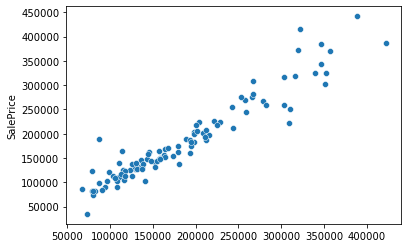

In [83]:
sns.scatterplot(pred_test_lr, y_test)

The above output shows that the RMSE, one of the two evaluation metrics, is 20464.81 for train data and 25657.11 for test data. On the other hand, R-squared value is 93.2 percent for train data and 90.6 percent for test data, which is a good performance.

## Lasso

In [84]:
from sklearn.linear_model import Lasso

In [85]:
linear = linear_model.LassoCV()
model = linear.fit(X_train_sc, y_train)

In [86]:
# Check for overfit between X_train and X_test

print(model.score(X_train_sc, y_train))
print(model.score(X_test_sc, y_test))

0.9119059555611873
0.9015010708626314


In [87]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)
pred_train_lasso = model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

20472.55689722198
0.9328272849295762
25740.025429057663
0.9055617967389815


C:\Users\nurha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408358141140.75476, tolerance: 1215458747.642836
  model = cd_fast.enet_coordinate_descent(


C:\Users\nurha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SalePrice'>

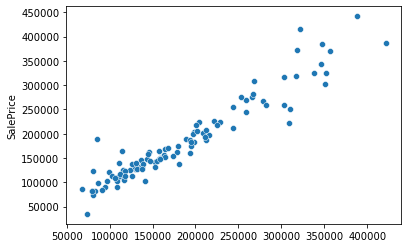

In [88]:
sns.scatterplot(pred_test_lasso, y_test)

The above output shows that the RMSE and R-squared values for the Lasso Regression model on the training data is 20472.55 and 93.2 percent, respectively.

The results for these metrics on the test data is 25740.0 and 90.5 percent, respectively. 

In [90]:
# Features with high coefficients from Lasso
lasso_features = pd.DataFrame(X_train.columns, columns=['feature'])
lasso_features['coef'] = model.coef_
lasso_features['abs_coef'] = np.abs(model.coef_)
lasso_features.sort_values(by='abs_coef', ascending=False).head(10)


,feature,coef,abs_coef
16,Gr Liv Area,19025.497833,19025.497833
4,Overall Qual,14142.978185,14142.978185
219,Kitchen Qual_TA,-10498.888453,10498.888453
89,Neighborhood_NridgHt,9555.908923,9555.908923
218,Kitchen Qual_Gd,-9532.262860,9532.262860
129,Roof Matl_CompShg,8832.291940,8832.291940
168,Exter Qual_TA,-7424.524300,7424.524300
6,Year Built,6515.119829,6515.119829
131,Roof Matl_Tar&Grv,6205.723685,6205.723685
95,Neighborhood_StoneBr,6063.067045,6063.067045


## Model Evaluation

#### Linear Regression Model
Test data is 25657.11 and 90.6 percent
#### Lasso Regression Model
Test data is 25740.0 and 90.5 percent

Based on these two models, it seems that there's not much difference however I am choosing Linear Regression for model evaluation below.

MAE: 15643.774041629458
MSE: 476183360.9452481
RMSE: 21821.625992241003
R Squared: 0.88


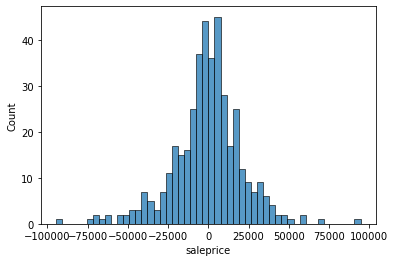

In [44]:
# Error Distribution

plt.figure()
sns.histplot((y_test - pred_test_lr), bins = 50)

# MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, pred_test_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_lr)))

# R Squared - Coefficient of Determination
print('R Squared:', round(model.score(X_test_sc, y_test),2))

In [91]:
y_pred = model.predict(test_data_sc)
y_pred.mean()

181329.39219712524

In [93]:
pred_cols = pd.DataFrame(y_pred, columns=['SalePrice'])
pred_cols['Id'] = test_data['Id']
pred_cols = pred_cols[['Id', 'SalePrice']]

In [95]:
pred_cols.head()

,Id,SalePrice
0,109,179489.886702
1,544,236352.191178
2,153,139591.331829
3,318,154385.960631
4,255,151096.988128


In [97]:
pred_cols.to_csv('project_02', index=False)

### Conclusions

From my analysis, both lasso and linear regression gives similar percentage on the testing with 90.6 and 90.5 percent respectively. In order to predict better prices, changes need to be made to the model. Eg, choose better features or drop columns that are not neccesary for predictions.